# P1: Test a Perceptual Phenomenon

In this problem set, we investigate the Stroop effect by examining the reaction times of individuals tasked with verbally identifying the color of words whose meanings conflict with their text color (see "Background Information" section of the prompt). 

Before beginning any analysis, it is important that we answer a few questions:

#### 1. What are the independent/dependent variables?

The *independent* variable is the word's color congruency. By the way, we say that a word is *incongruent* if its meaning and text color are in conflict. The reverse is true for *congruent*.

The *dependent* variable is the reaction time&mdash;in this experiment, a measurement of the total amount of time taken to read a sequence of words.

#### 2. What set of hypotheses and statistical tests should we employ in order to achieve our research objective?
The main research objective is to investigate whether there exists a difference in effect on reaction time between reading congruent and incongruent words. In particular, we will test 

\begin{align}
H_0&:\text{the population mean reaction time for reading incongruent words is less than or equal to that for reading congruent words} \\
H_1&:\text{the population mean reaction time for reading incongruent words is greater than that for reading congruent words}
\end{align}

or, more technically,
$$ H_0: \mu_{incongruent} \leq \mu_{congruent}\text{ vs }H_1: \mu_{incongruent} > \mu_{congruent} $$

Note that this is a within-subject experimental design: each row corresponds to a single participant, so the congruent and incongruent samples must be dependent. Thus we will use a paired t-test.

By the way, here are my results from taking the test: 

my_congruent = 8.958; my_incongruent = 24.649

I don't include them in the analysis, since that would nullify the randomness of the random sampling, but it is from these results that I decided to do a one-sided t-test.

## Analysis

In [1]:
import pandas as pd

data_dir = '...\\' 

data = pd.read_csv(data_dir + 'stroopdata.csv')

### Data exploration and checking the assumptions of the paired t-test

I make box plots in order to get a sense of the samples' spreads as well as to highlight outliers.

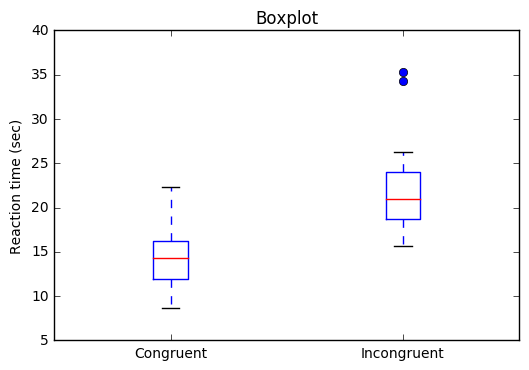

In [2]:
%matplotlib inline

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

con = data['Congruent']
incon = data['Incongruent']

fig = plt.figure(1)

ax = fig.add_subplot(111)

ax.boxplot([con, incon], flierprops={'marker': 'o'}, labels=['Congruent', 'Incongruent'])

ax.set_ylabel('Reaction time (sec)')
ax.set_title('Boxplot')

plt.show()

It's worth making a mental note of the outliers in the incongruent group, in the event that it plays an important role in our test's performance later on.

#### Normality
One assumption of the test is that the two groups come from a population with a normal distribution. Let's make sure that it holds.

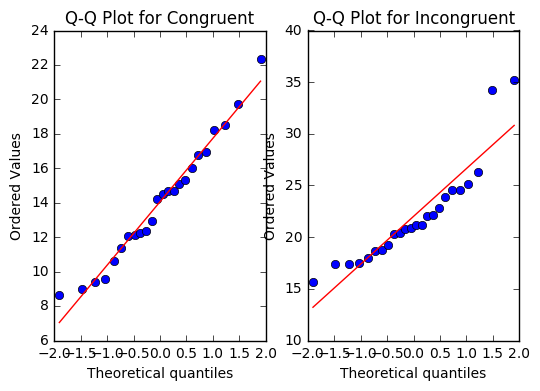

In [3]:
from scipy.stats import probplot

plt.subplot(1, 2, 1)
probplot(con, dist='norm', plot=plt)
plt.title('Q-Q Plot for Congruent')

plt.subplot(1, 2, 2)
probplot(incon, dist='norm', plot=plt)
plt.title('Q-Q Plot for Incongruent')

plt.show()

The congruent data appears pretty normal; however, the same cannot be said for the incongruent data. Let's see if the paired difference values are normally distributed.

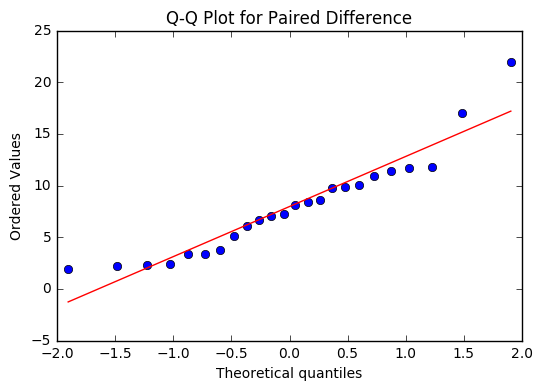

In [4]:
probplot(incon - con, dist='norm', plot=plt)
plt.title('Q-Q Plot for Paired Difference')

plt.show()

This does not look normal. We can further support or refute this observation by using the Wilcoxon signed-rank test, whose hypotheses set is 

\begin{align}
H_0&:\text{paired samples come from the same distribution} \\
H_1&:\text{paired samples do not come from the same distribution}
\end{align}

Note that our sample size is 24, so it's just about large enough for this test.

In [5]:
from scipy.stats import wilcoxon

wilcoxon(incon, con)[1]

1.821529714896801e-05

That is a *very* low p-value, so we would reject the null hypothesis at any conventional significance level. Thus it is either that 1) neither sample is from a normally distributed population or 2) the incongruent group is not from a normally distributed population. I very much lean toward number 2.

This violation may not be that big of a deal, though; as, according to [this article](http://www.psychology.emory.edu/clinical/bliwise/Tutorials/TOM/meanstests/assump.htm), the paired t-test is robust for violations of this assumption.

### Descriptive statistics

In [6]:
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Two things immediately grabbed my attention:
1. The spread of the groups (the standard deviation) is much larger than I expected. It's just an observation&mdash;nothing to worry about.
2. There appears to be a substantial difference in the mean of the two groups. For good measure, we will supply it with a more substantive justification.

### Hypothesis testing

Recall that our objective is to test 
$$ H_0: \mu_D = 0\text{ vs }H_1: \mu_D \neq 0 $$

and that, since the congruent and incongruent samples are dependent, we will use a paired t-test.

So let's gather all of the necessary components for this test.

In [7]:
diff_series = pd.Series(data['Incongruent'] - data['Congruent'], name='Difference')

diff_series.describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
Name: Difference, dtype: float64

Under the null hypothesis, $$ T = \frac{\bar{x}_D - 0}{\frac{s_D}{\sqrt{n}}} \sim t(n-1) $$

Our critical value at significance level $\alpha = 0.05$ is $t^{*}_{0.05}(24-1) = 1.714$

So, $$T = \frac{7.964792 - 0}{\frac{4.864827}{\sqrt{24}}} \approx 8.02 >> 1.714 $$

Clearly, we reject the null hypothesis in favor of the alternative: $T = 8.02$ is *much* larger than $t^{*}_{0.05}(23) = 1.714$; or alternatively, our p-value 0.00000002 is *much* less than 0.05. In other words, we can say that there is significant evidence to suggest that the mean reaction times for reading incongruent words is greater than those for congruent.

## Final Note

Our conclusion isn't surprising&mdash;my attempt to perform the experimental task left me with a strong expectation toward the test's conclusion and is what persuaded me to choose a one-sided t-test. 